# Practicing K-Means

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


In [3]:
df = df[['Pu239', 'Pu240']]
df.head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


Text(0.5,1,'Percentage of Pu239 and Pu240 isotopes')

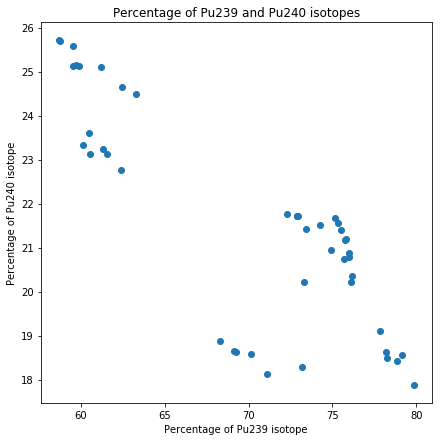

In [4]:
plt.figure(figsize=(7,7))
plt.scatter(df['Pu239'], df['Pu240'])
plt.xlabel("Percentage of Pu239 isotope")
plt.ylabel("Percentage of Pu240 isotope")
plt.title("Percentage of Pu239 and Pu240 isotopes")

In [6]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df[['Pu239', 'Pu240']])

In [7]:
df['predicted'] = model.labels_
df.head()

,Pu239,Pu240,predicted
0,75.804,21.204,2
1,75.515,21.408,2
2,75.175,21.668,2
3,78.872,18.428,2
4,73.317,20.223,0


In [8]:
centroids = pd.DataFrame(model.cluster_centers_)
centroids = centroids.rename(columns={0: 'x1', 1: 'x2'})
centroids

,x1,x2
0,71.573167,19.973917
1,60.633933,24.387533
2,76.593000,20.194833


Text(0,0.5,'Percentage of Pu240 isotope')

<Figure size 504x504 with 0 Axes>

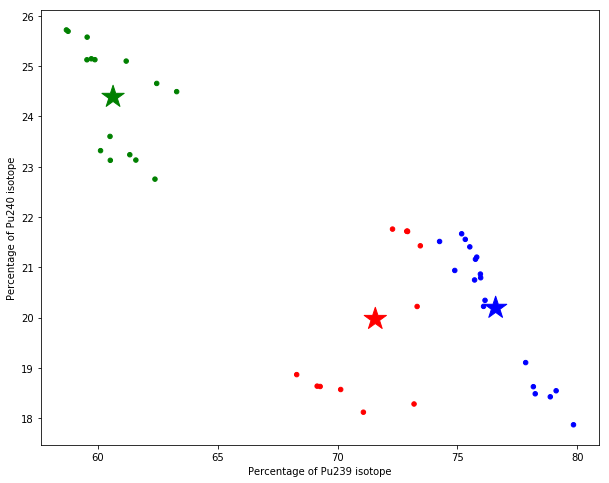

In [9]:
plt.figure(figsize=(7,7))

colors = ["red", "green", "blue"]
df['color'] = df['predicted'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="x1", y="x2", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
)

plt.xlabel("Percentage of Pu239 isotope")
plt.ylabel("Percentage of Pu240 isotope")

#### Roll the above into a repeatable function

In [18]:
def do_clustering(X, num_clusters, colors = ["red", "green", "blue"]):
    '''
    X: the dataframe with two columns: Pu239 and Pu240
    Num_clusters: number of clustters to try to find
    '''
    kmeans = KMeans(n_clusters=num_clusters)
    model = kmeans.fit(X[['Pu239', 'Pu240']])
    X['predicted'] = model.labels_
    
    centroids = pd.DataFrame(model.cluster_centers_)
    centroids = centroids.rename(columns={0: 'x1', 1: 'x2'})
    
    
    plt.figure(figsize=(7,7))

    X['color'] = X['predicted'].map(lambda p: colors[p])

    ax = X.plot(    
        kind="scatter", 
        x="Pu239", y="Pu240",
        figsize=(10,8),
        c = df['color']
    )

    centroids.plot(
        kind="scatter", 
        x="x1", y="x2", 
        marker="*", c=["r", "g", "b"], s=550,
        ax=ax
    )

    plt.xlabel("Percentage of Pu239 isotope")
    plt.ylabel("Percentage of Pu240 isotope")
    
    print(f"silhouette score: {silhouette_score(X[['Pu239', 'Pu240']], model.labels_)}")
    print(f"Inertia: {model.inertia_}")

In [11]:
ss = StandardScaler()
df[['Pu239', 'Pu240']]=ss.fit_transform(df[['Pu239', 'Pu240']])

In [12]:
df.head()

,Pu239,Pu240,predicted,color
0,0.832106,-0.138176,2,blue
1,0.791133,-0.052625,2,blue
2,0.742931,0.056409,2,blue
3,1.267063,-1.302330,2,blue
4,0.479518,-0.549572,0,red


silhouette score: 0.6332174776862322
Inertia: 9.743959906376597


<Figure size 504x504 with 0 Axes>

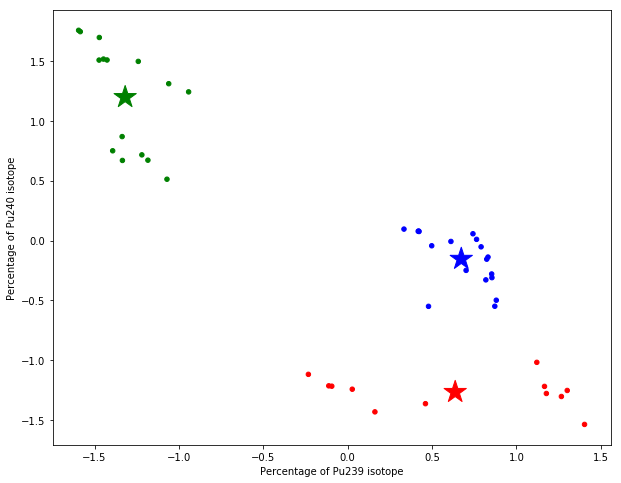

In [19]:
do_clustering(df, 3)

silhouette score: 0.7196283186162103
Inertia: 5.391655340660361


<Figure size 504x504 with 0 Axes>

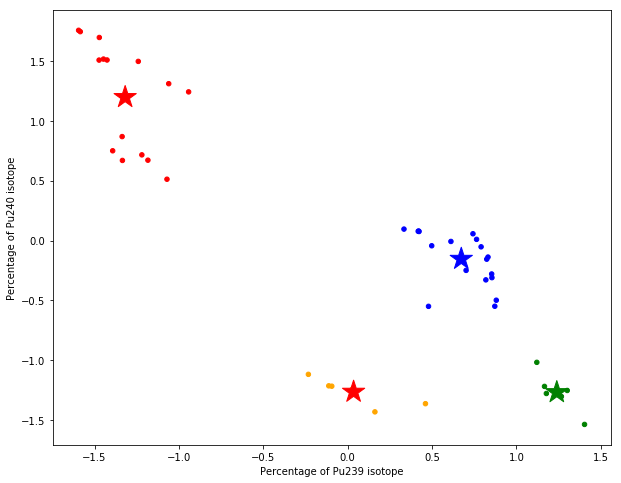

In [20]:
do_clustering(df, 4, colors=["red", "green", "blue", "orange"])

silhouette score: 0.6861082018190416
Inertia: 2.8567755357820652


<Figure size 504x504 with 0 Axes>

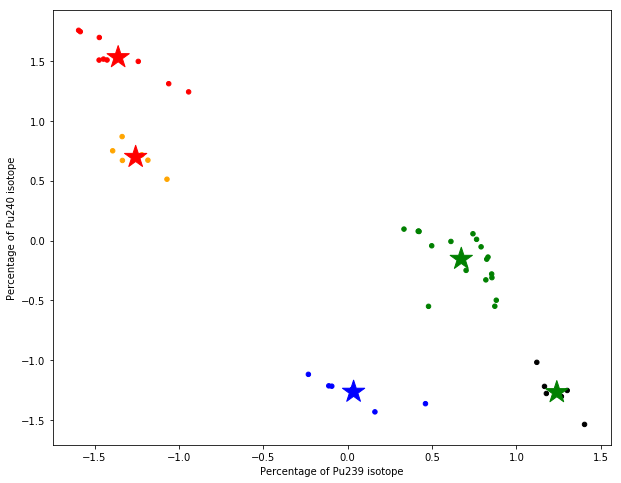

In [21]:
do_clustering(df, 5, colors=["red", "green", "blue", "orange","black"])

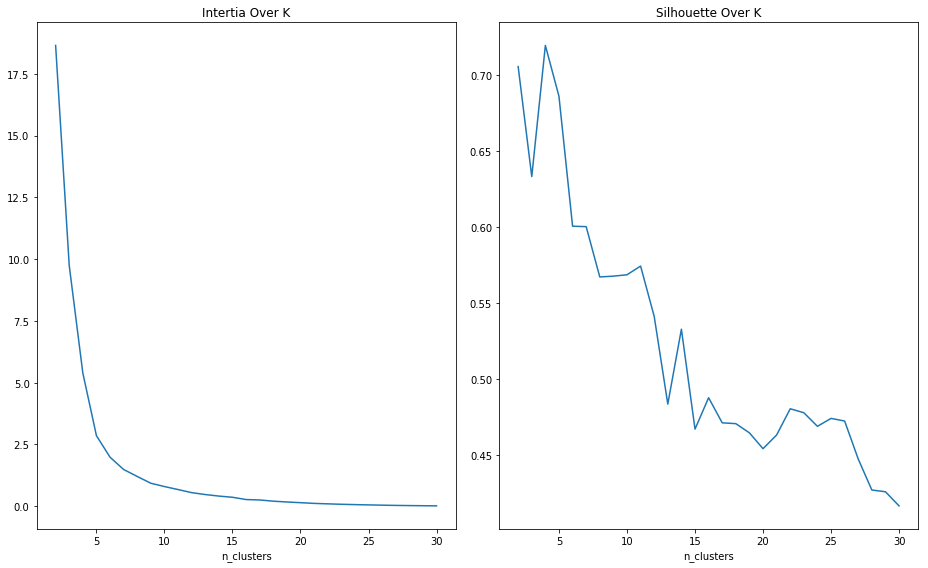

In [23]:
class eval_kmeans:
    
    param_grid = dict(n_clusters=np.arange(2, 31))
    model = None
    scores = []
    
    def __init__(self, param_grid = None):
        
        if param_grid:
            self.param_grid = ParameterGrid(param_grid)
    
    def fit(self, X, scorer="silhouette"):
        
        for param, values in self.param_grid.items():
            
            for value in values:
        
                estimator = KMeans(n_clusters = value)
                model = estimator.fit(df[['Pu239', 'Pu240']])
                
                score    = silhouette_score(df[['Pu239', 'Pu240']], model.labels_)
                
                self.scores.append({
                    param:        value,
                    "inertia":    model.inertia_,
                    "silhouette": score
                })
                
    def get_scores(self):
        return pd.DataFrame(self.scores)
    
kmeans = eval_kmeans()
kmeans.fit(df[['Pu239', 'Pu240']])

eval_scores = kmeans.get_scores()
eval_scores.set_index("n_clusters", inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(13, 8))
eval_scores["inertia"].plot(ax=ax[0], title="Intertia Over K")
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")

fig.tight_layout()